In [2]:
import qiskit.opflow as of

In [3]:
def energy_evaluation(hamiltonian, ansatz, parameters , quantum_instance, callback=None):
    
    ansatz_state = of.StateFn( ansatz.bind_parameters(parameters) )
    measurement = of.StateFn( hamiltonian ).adjoint() @ ansatz_state
    
    pauli_circs = of.PauliExpectation().convert(measurement)
    sampler = of.CircuitSampler(quantum_instance).convert(pauli_circs)
    
    evaluation = sampler.eval().real

    if callback is not None:
        callback( parameters, evaluation )

    return evaluation

In [13]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

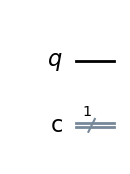

In [25]:
ansatz = QuantumCircuit(1,1)
ansatz.draw('mpl')

In [26]:
hamiltonian = of.Z + of.X + of.Y 

In [27]:
ansatz_state = of.StateFn( ansatz )
measurement = of.StateFn( hamiltonian ).adjoint() @ ansatz_state
pauli_circs = of.PauliExpectation().convert(measurement)

TypeError: CircuitOp does not support QuantumCircuits with ClassicalRegisters.

In [23]:
pauli_circs

SummedOp([ComposedOp([OperatorStateFn(PauliSumOp(SparsePauliOp(['Z'],
              coeffs=[1.+0.j]), coeff=1.0), coeff=1.0, is_measurement=True), CircuitStateFn(<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x0000017724125D30>, coeff=1.0, is_measurement=False)], coeff=1.0, abelian=False), ComposedOp([OperatorStateFn(PauliSumOp(SparsePauliOp(['Z'],
              coeffs=[1.+0.j]), coeff=1.0), coeff=1.0, is_measurement=True), CircuitStateFn(<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000177241257C0>, coeff=1.0, is_measurement=False)], coeff=1.0, abelian=False), ComposedOp([OperatorStateFn(PauliSumOp(SparsePauliOp(['Z'],
              coeffs=[1.+0.j]), coeff=1.0), coeff=1.0, is_measurement=True), CircuitStateFn(<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001772415A910>, coeff=1.0, is_measurement=False)], coeff=1.0, abelian=False)], coeff=1.0, abelian=False)

In [ ]:
of.CircuitSampler(AerSimulator()).convert

In [ ]:
of.CircuitSampler(AerSimulator()).convert

In [14]:
sampler = of.CircuitSampler(AerSimulator()).convert(pauli_circs)
sampler

SummedOp([ComposedOp([OperatorStateFn(PauliSumOp(SparsePauliOp(['Z'],
              coeffs=[1.+0.j]), coeff=1.0), coeff=1.0, is_measurement=True), DictStateFn({'0': 1.0}, coeff=1.0, is_measurement=False)], coeff=1.0, abelian=False), ComposedOp([OperatorStateFn(PauliSumOp(SparsePauliOp(['Z'],
              coeffs=[1.+0.j]), coeff=1.0), coeff=1.0, is_measurement=True), DictStateFn({'0': 0.6945659615904022, '1': 0.7194290270763336}, coeff=1.0, is_measurement=False)], coeff=1.0, abelian=False), ComposedOp([OperatorStateFn(PauliSumOp(SparsePauliOp(['Z'],
              coeffs=[1.+0.j]), coeff=1.0), coeff=1.0, is_measurement=True), DictStateFn({'1': 0.6882098607982887, '0': 0.7255116728902438}, coeff=1.0, is_measurement=False)], coeff=1.0, abelian=False)], coeff=1.0, abelian=False)

In [20]:
sampler.eval().real

1.0175781250000002